In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Aryan\Desktop\Data\Online News Articles\OnlineNewsPopularity\OnlineNewsPopularity.csv",sep='\s*,\s*')
df.head()

C:\Users\Aryan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#Separating URLs from the main data
urls = df.url
df = df.drop(['url'],axis=1)

# Detecting Outliers

Outliers can easily be detected through boxplot

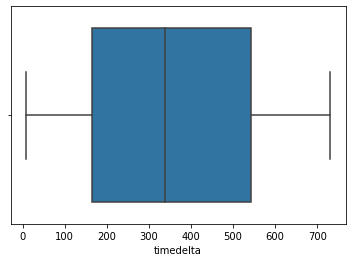

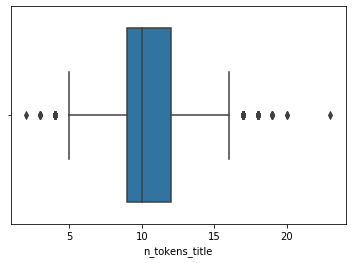

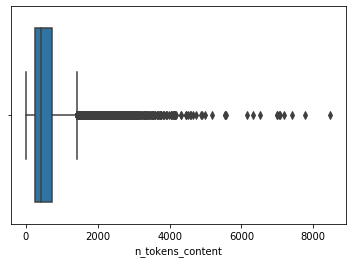

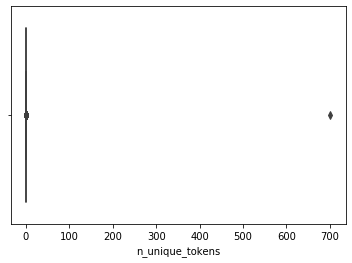

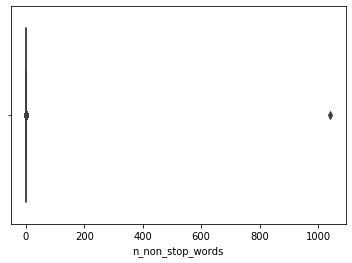

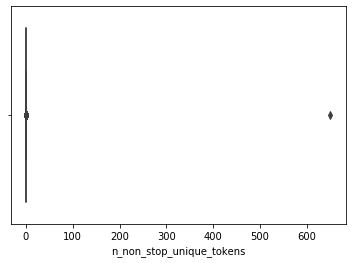

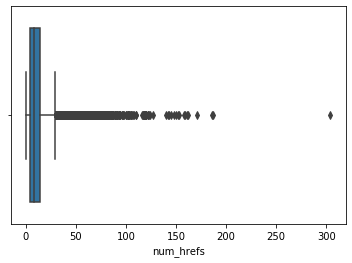

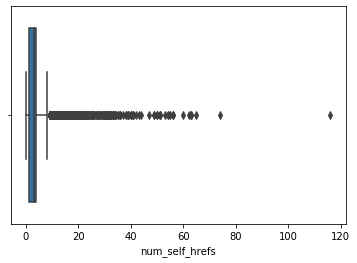

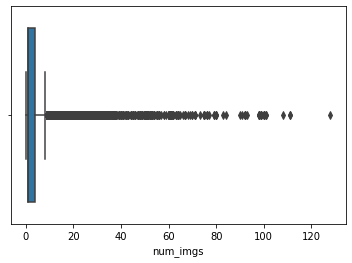

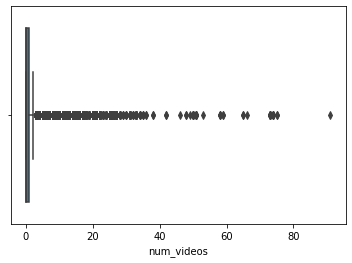

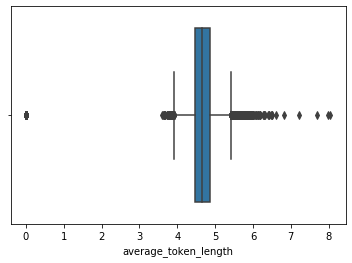

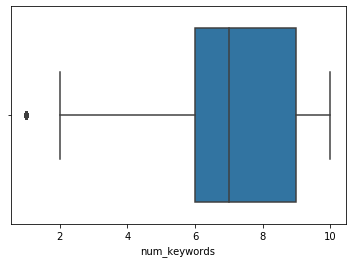

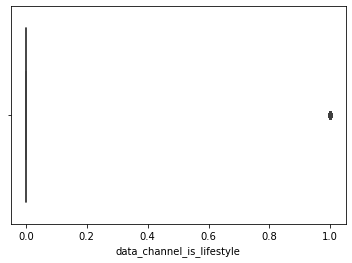

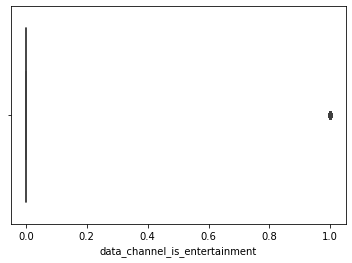

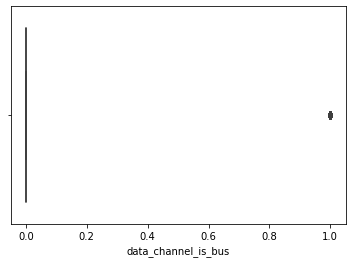

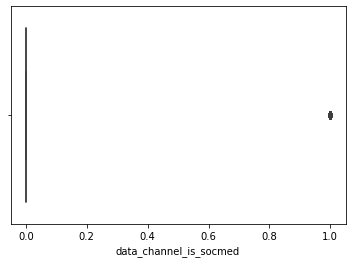

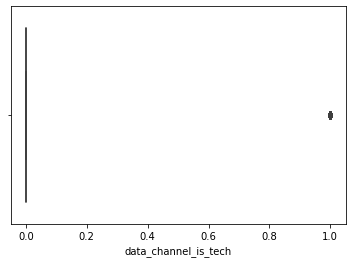

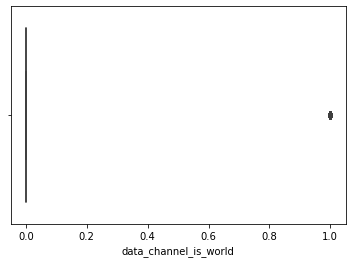

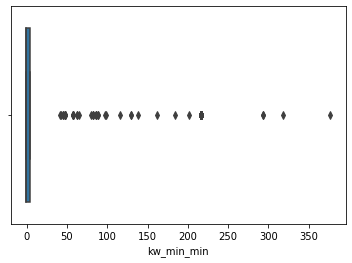

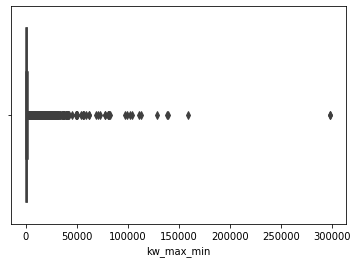

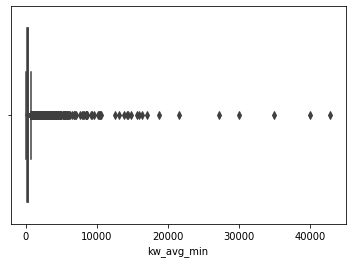

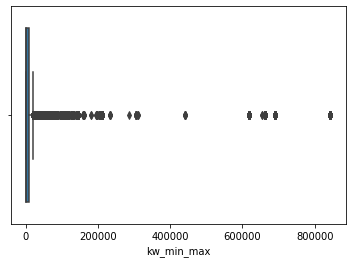

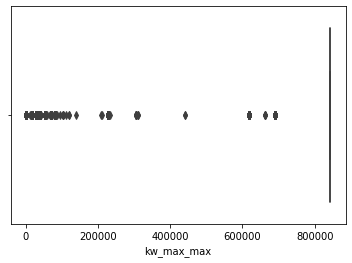

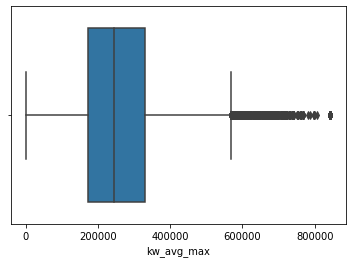

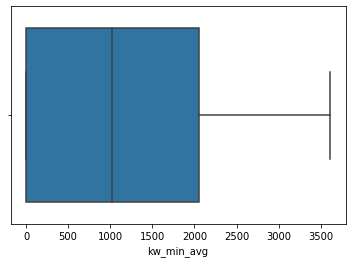

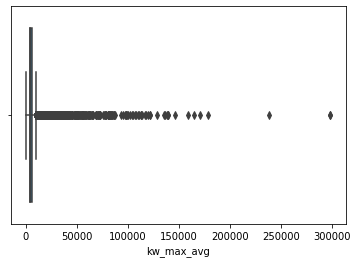

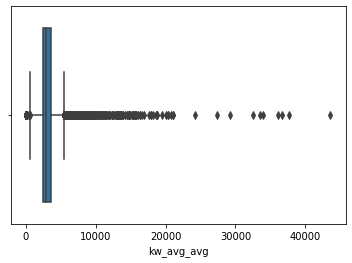

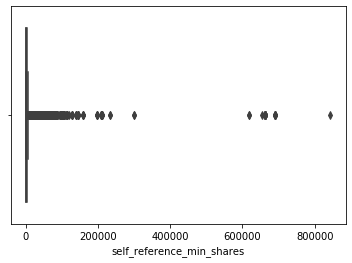

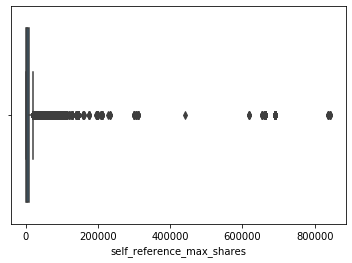

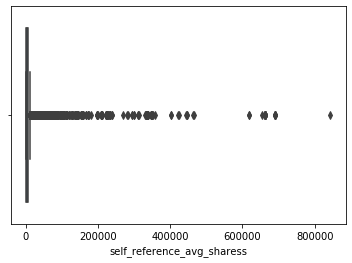

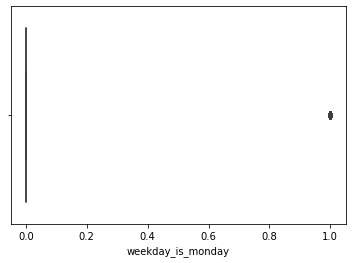

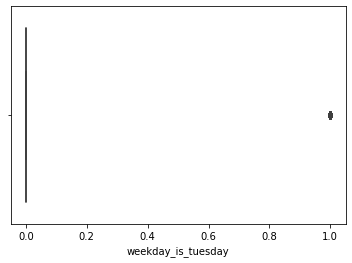

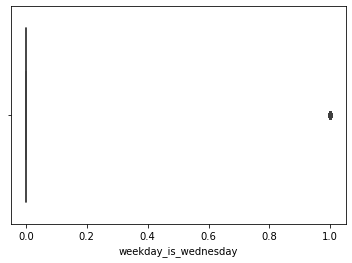

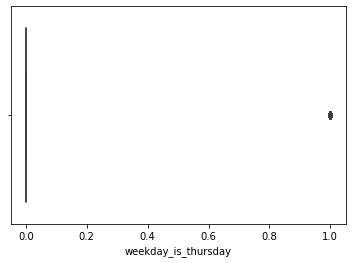

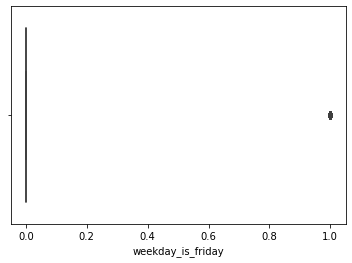

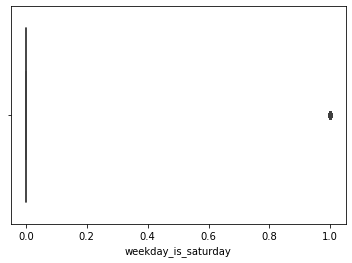

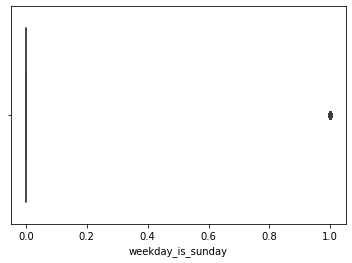

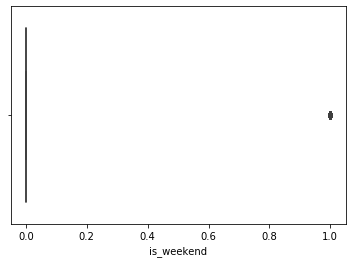

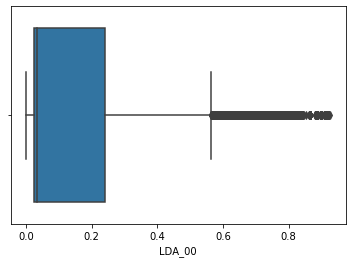

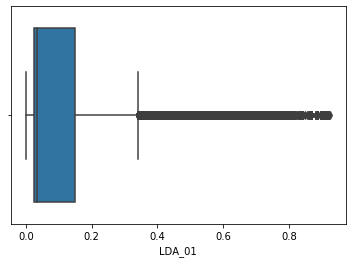

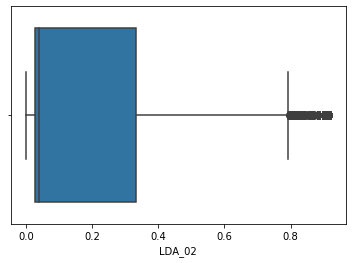

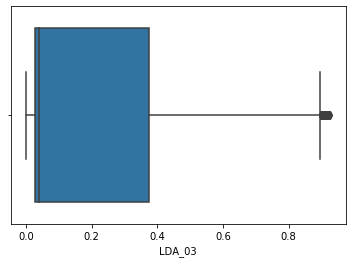

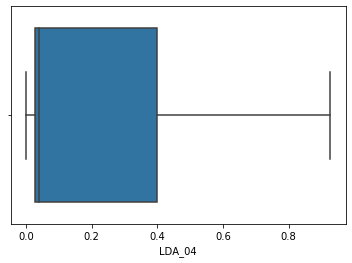

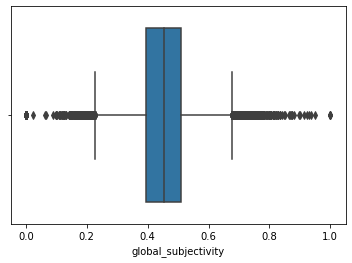

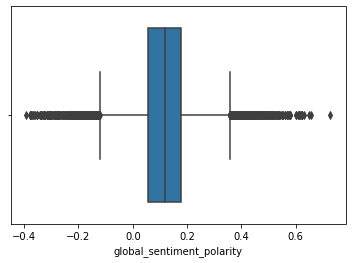

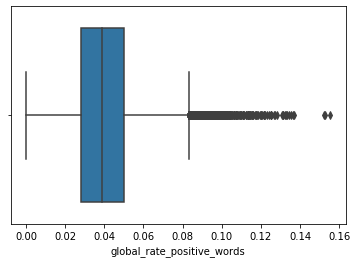

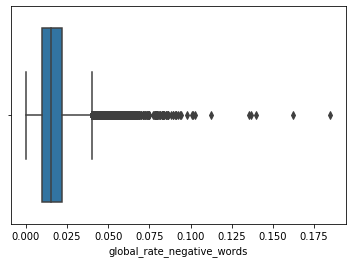

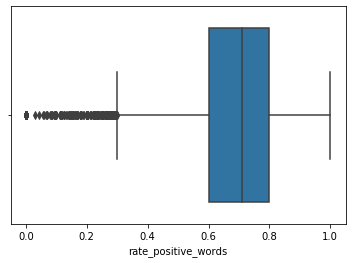

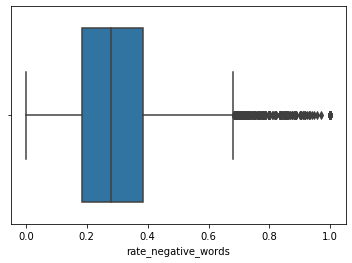

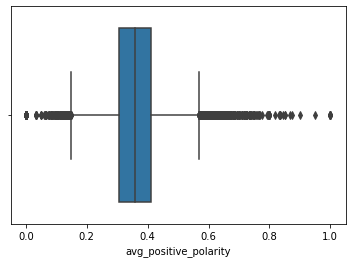

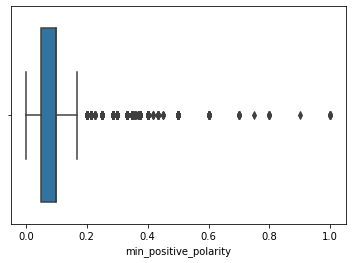

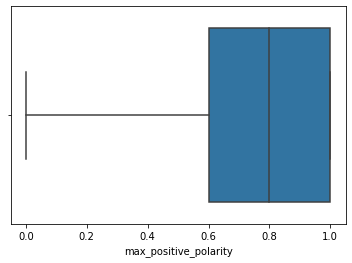

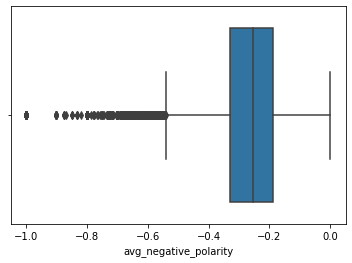

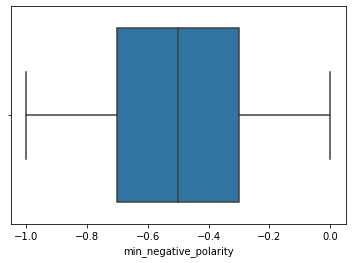

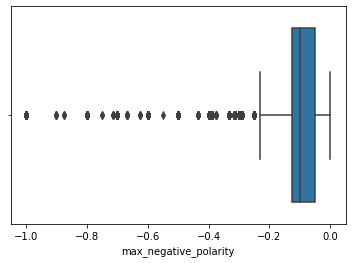

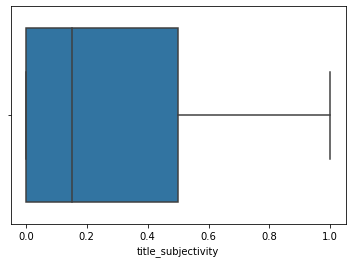

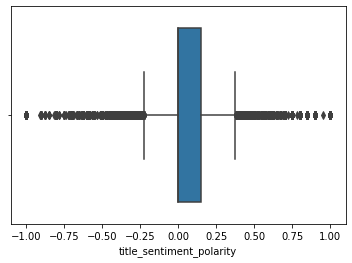

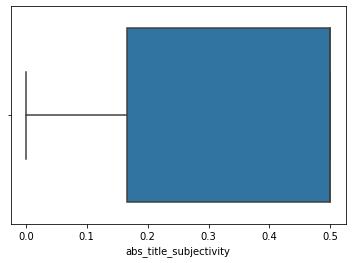

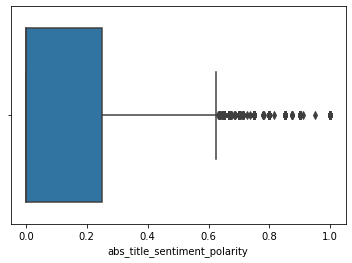

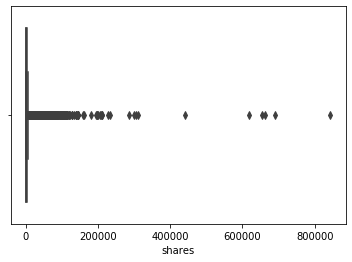

In [3]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# Removing Outliers

Here we make use of IQR (Interquartile Range) Method for removing outliers

In [3]:
Q1 = df.quantile(q=0.25) 

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

Sorting and taking the median values from shares column

In [3]:
sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

q1 = sorted_shares['shares'].quantile(q=0.25) 

q3 = sorted_shares['shares'].quantile(q=0.75) 

iqr = q3-q1

Finding Major and Minor Outliers

In [4]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


So we select the 2nd Outer Boundary for Outlier Removal

In [5]:
Df = df[df['shares']<=Outer_bound2]

In [6]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 60)
Data after Removing Outliers = (36879, 60)
Number of Outliers = 2765


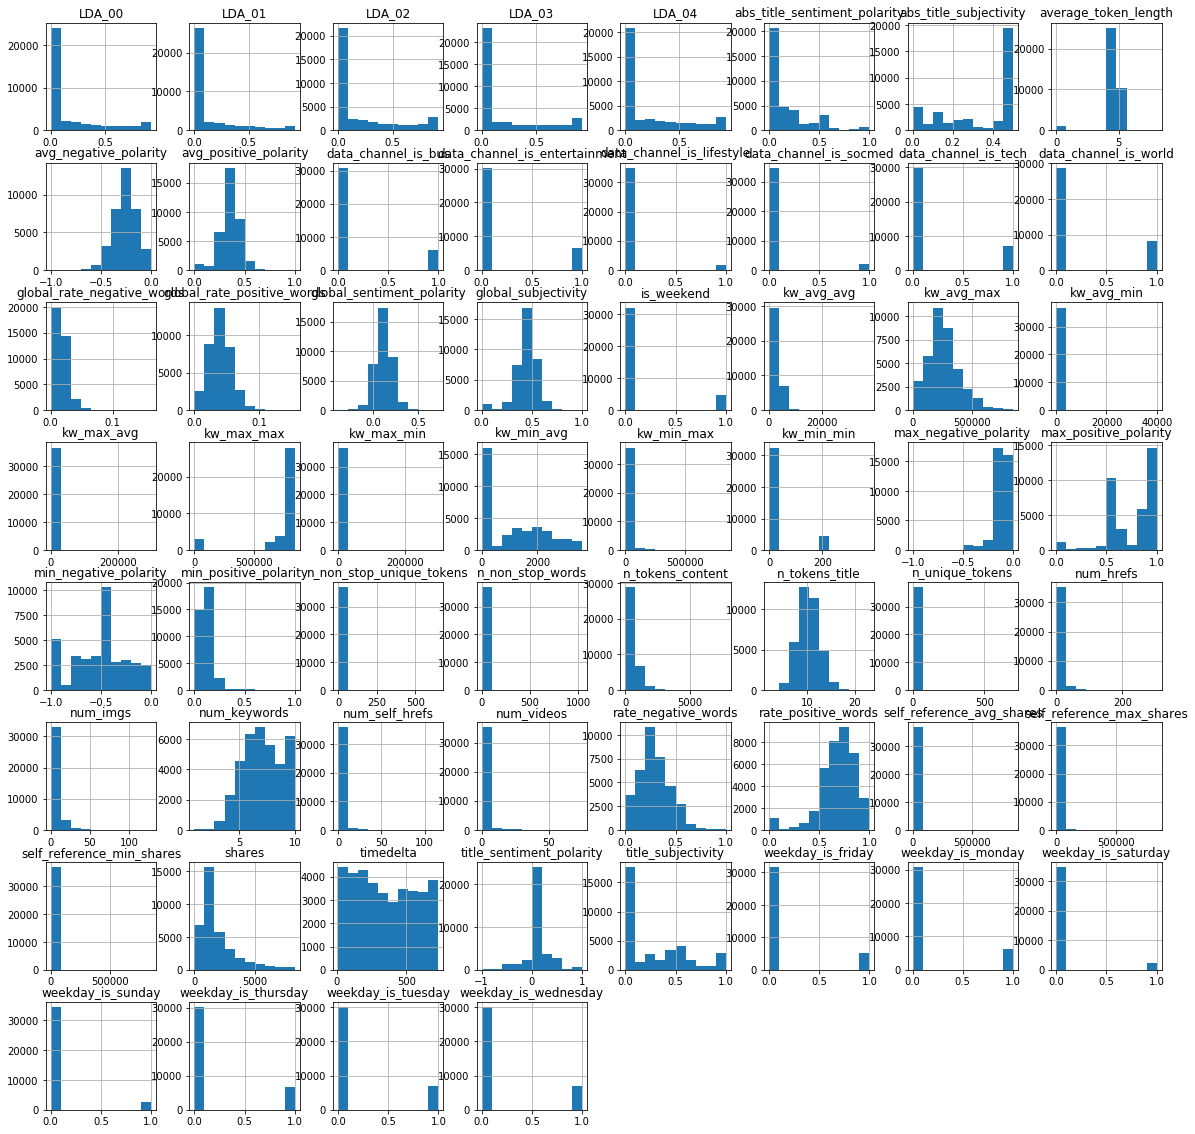

In [7]:
Df.hist(figsize=(20,20))
plt.show()

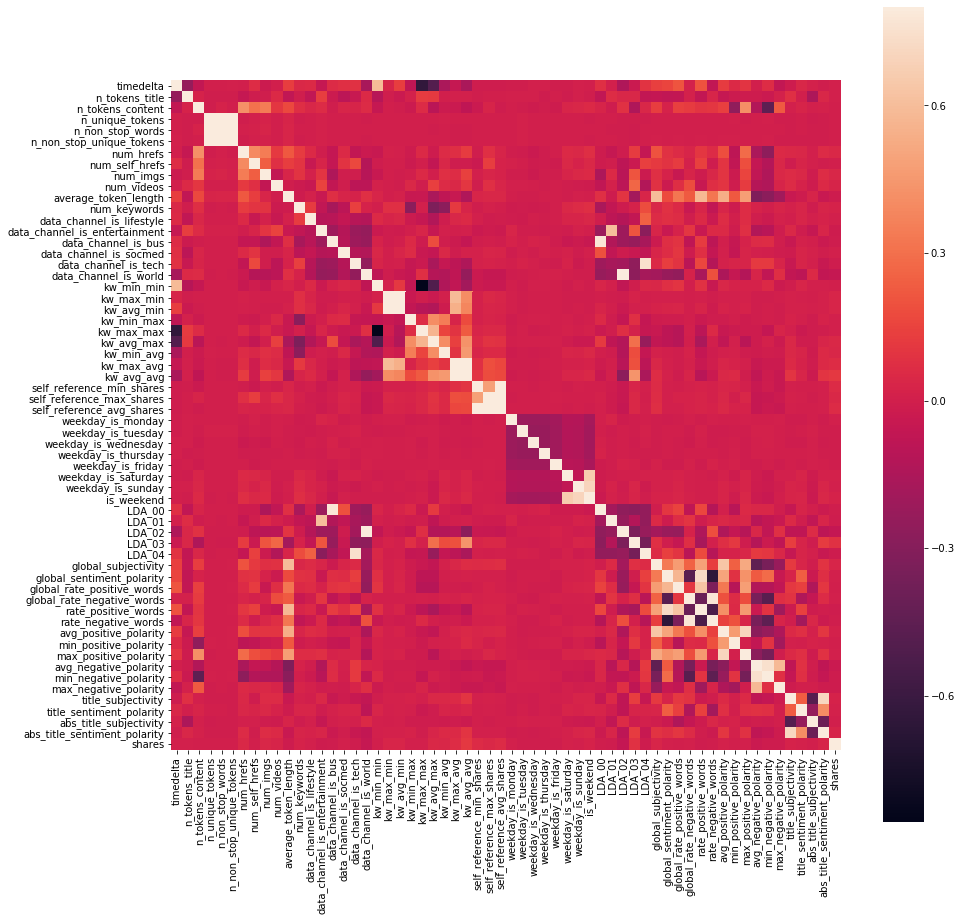

In [8]:
corr = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [9]:
#Helping Index for referrings
for i in range(len(Df.columns)):
    print(f'{i} -> {Df.columns[i]}')

0 -> timedelta
1 -> n_tokens_title
2 -> n_tokens_content
3 -> n_unique_tokens
4 -> n_non_stop_words
5 -> n_non_stop_unique_tokens
6 -> num_hrefs
7 -> num_self_hrefs
8 -> num_imgs
9 -> num_videos
10 -> average_token_length
11 -> num_keywords
12 -> data_channel_is_lifestyle
13 -> data_channel_is_entertainment
14 -> data_channel_is_bus
15 -> data_channel_is_socmed
16 -> data_channel_is_tech
17 -> data_channel_is_world
18 -> kw_min_min
19 -> kw_max_min
20 -> kw_avg_min
21 -> kw_min_max
22 -> kw_max_max
23 -> kw_avg_max
24 -> kw_min_avg
25 -> kw_max_avg
26 -> kw_avg_avg
27 -> self_reference_min_shares
28 -> self_reference_max_shares
29 -> self_reference_avg_shares
30 -> weekday_is_monday
31 -> weekday_is_tuesday
32 -> weekday_is_wednesday
33 -> weekday_is_thursday
34 -> weekday_is_friday
35 -> weekday_is_saturday
36 -> weekday_is_sunday
37 -> is_weekend
38 -> LDA_00
39 -> LDA_01
40 -> LDA_02
41 -> LDA_03
42 -> LDA_04
43 -> global_subjectivity
44 -> global_sentiment_polarity
45 -> global_rat

# Exploratory Data Analysis

In [10]:
a,b = Df['shares'].mean(),Df['shares'].median()

In [11]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [12]:
Wd = Df.columns.values[30:37]
Wd

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

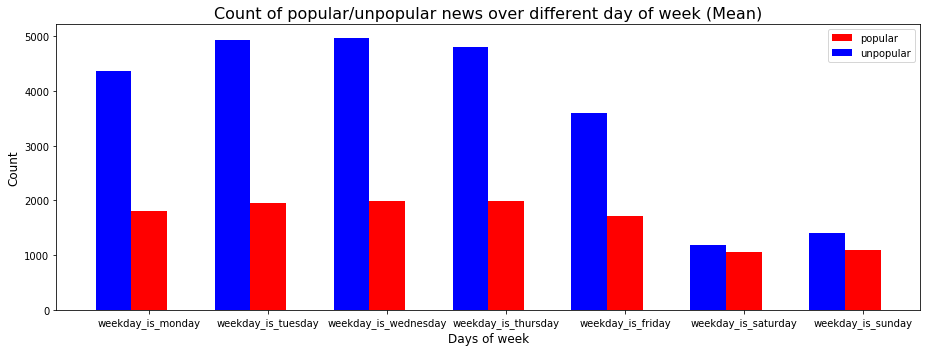

In [13]:
Unpop=Df[Df['shares']<a]
Pop=Df[Df['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

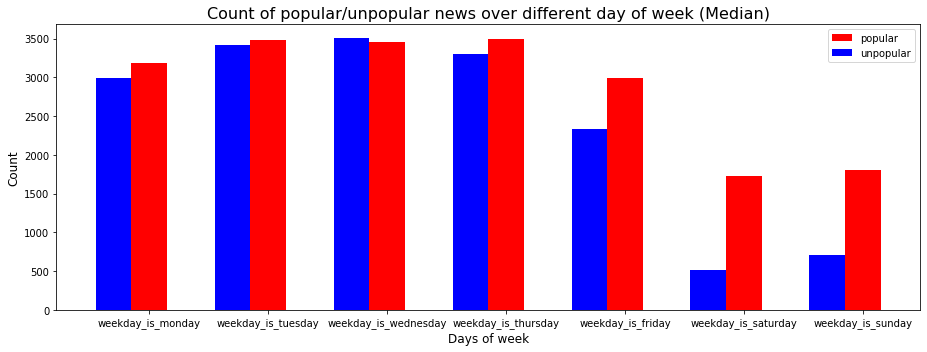

In [14]:
Unpop2=Df[Df['shares']<b]
Pop2=Df[Df['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [15]:
Dc = Df.columns.values[12:18]

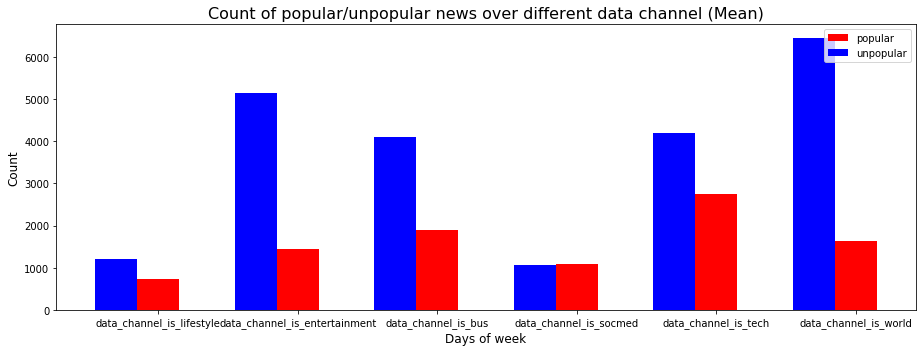

In [16]:
Unpop3=Df[Df['shares']<a]
Pop3=Df[Df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

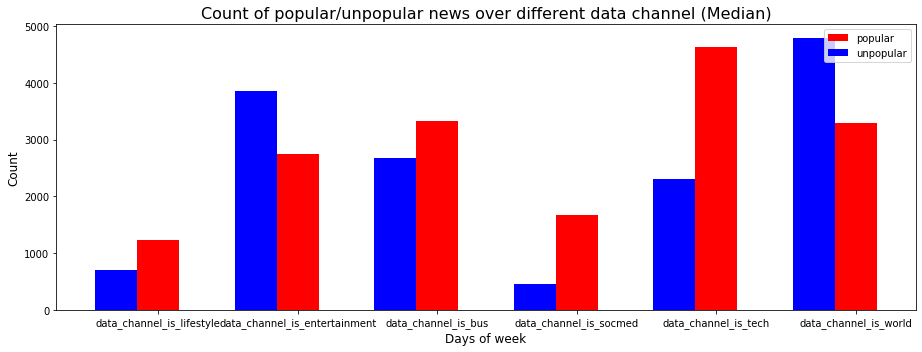

In [17]:
Unpop4=Df[Df['shares']<b]
Pop4=Df[Df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# Train-Test Splitting

In [18]:
from sklearn.preprocessing import scale as s
from sklearn.model_selection import train_test_split as t

In [19]:
DF = s(Df)

In [20]:
train,test = t(DF,test_size=0.2,random_state=0)

In [21]:
train_x,train_y = DF[:,0:59],DF[:,59] 

In [22]:
test_x,test_y = DF[:,0:59],DF[:,59]

# Using Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [24]:
nn = Sequential()

#Input Layer
nn.add(Dense(59,input_dim = train_x.shape[1],kernel_initializer='normal',activation='relu'))

#Hidden Layer(s)
nn.add(Dense(200,activation='relu'))
nn.add(Dense(100,activation='relu'))
nn.add(Dense(50,activation='relu'))
nn.add(Dense(20,activation='relu'))


#Output Layer
nn.add(Dense(1,activation='linear'))

#Compilation
nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
nn.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 59)                3540      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               12000     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 41,731
Trainable params: 41,731
Non-trainable params: 0


In [25]:
history = nn.fit(train_x, train_y, epochs=100, batch_size=32, validation_split = 0.2, verbose=1)
loss = history.history['loss']

Instructions for updating:
Use tf.cast instead.
Train on 29503 samples, validate on 7376 samples
Epoch 1/100
29503/29503 [==============================] - 6s 192us/step - loss: 0.6313 - mean_squared_error: 1.0695 - val_loss: 0.5583 - val_mean_squared_error: 0.8583
Epoch 2/100
29503/29503 [==============================] - 4s 137us/step - loss: 0.6177 - mean_squared_error: 1.0262 - val_loss: 0.5548 - val_mean_squared_error: 0.8692
Epoch 3/100
29503/29503 [==============================] - 4s 136us/step - loss: 0.6125 - mean_squared_error: 1.0157 - val_loss: 0.5537 - val_mean_squared_error: 0.8423
Epoch 4/100
29503/29503 [==============================] - 4s 137us/step - loss: 0.6079 - mean_squared_error: 1.0048 - val_loss: 0.5465 - val_mean_squared_error: 0.8644
Epoch 5/100
29503/29503 [==============================] - 4s 136us/step - loss: 0.6044 - mean_squared_error: 0.9941 - val_loss: 0.5485 - val_mean_squared_error: 0.8442
Epoch 6/100
29503/29503 [==============================] -

29503/29503 [==============================] - 4s 135us/step - loss: 0.3935 - mean_squared_error: 0.4832 - val_loss: 0.6428 - val_mean_squared_error: 1.0423
Epoch 48/100
29503/29503 [==============================] - 4s 134us/step - loss: 0.3909 - mean_squared_error: 0.4776 - val_loss: 0.6409 - val_mean_squared_error: 1.0250
Epoch 49/100
29503/29503 [==============================] - 4s 134us/step - loss: 0.3882 - mean_squared_error: 0.4678 - val_loss: 0.6307 - val_mean_squared_error: 1.0147
Epoch 50/100
29503/29503 [==============================] - 4s 134us/step - loss: 0.3834 - mean_squared_error: 0.4612 - val_loss: 0.6291 - val_mean_squared_error: 1.0389
Epoch 51/100
29503/29503 [==============================] - 4s 135us/step - loss: 0.3802 - mean_squared_error: 0.4544 - val_loss: 0.6405 - val_mean_squared_error: 1.0396
Epoch 52/100
29503/29503 [==============================] - 4s 134us/step - loss: 0.3780 - mean_squared_error: 0.4477 - val_loss: 0.6422 - val_mean_squared_error: 

29503/29503 [==============================] - 4s 132us/step - loss: 0.2946 - mean_squared_error: 0.2875 - val_loss: 0.6637 - val_mean_squared_error: 1.0998
Epoch 96/100
29503/29503 [==============================] - 4s 130us/step - loss: 0.2947 - mean_squared_error: 0.2889 - val_loss: 0.6571 - val_mean_squared_error: 1.0609
Epoch 97/100
29503/29503 [==============================] - 4s 131us/step - loss: 0.2925 - mean_squared_error: 0.2826 - val_loss: 0.6443 - val_mean_squared_error: 1.0486
Epoch 98/100
29503/29503 [==============================] - 4s 133us/step - loss: 0.2944 - mean_squared_error: 0.2854 - val_loss: 0.6573 - val_mean_squared_error: 1.0689
Epoch 99/100
29503/29503 [==============================] - 4s 141us/step - loss: 0.2917 - mean_squared_error: 0.2829 - val_loss: 0.6706 - val_mean_squared_error: 1.0833
Epoch 100/100
29503/29503 [==============================] - 4s 138us/step - loss: 0.2889 - mean_squared_error: 0.2785 - val_loss: 0.6452 - val_mean_squared_error:

In [26]:
nn.evaluate(test_x,test_y)

36879/36879 [==============================] - 2s 49us/step


[0.3506340391271469, 0.42166973938183366]

In [27]:
from keras.optimizers import SGD
opt = SGD(lr=0.5,momentum=0.9)
nn.compile(loss='mean_squared_error',optimizer=opt)

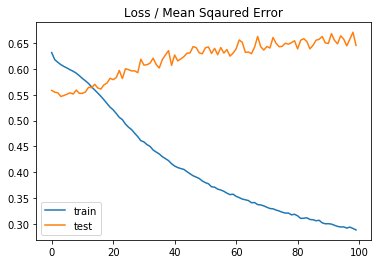

In [28]:
plt.title('Loss / Mean Sqaured Error')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [30]:
y_pred = nn.predict(test_x)
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from math import sqrt
print(f'MAE  = {mean_absolute_error(test_y,y_pred)}')
print(f'MSE  = {mean_squared_error(test_y,y_pred)}')
print(f'RMSE = {sqrt(mean_squared_error(test_y,y_pred))}')

MAE  = 0.3506340389334261
MSE  = 0.4216697380768375
RMSE = 0.6493610229116292


In [31]:
train_mse = nn.evaluate(train_x,train_y,verbose=0)
test_mse = nn.evaluate(test_x,test_y,verbose=0)
print('Train = %.3f, Test = %.3f' % (train_mse,test_mse))

Train = 0.422, Test = 0.422
